In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from asa.dataset import Dataset
from asa.plot_methods import plot_trend

In [3]:
x = np.random.normal(size=1000)
y = x**2 + np.random.normal(size=1000)
z = np.log(np.abs(x + y)) + np.random.normal(size=1000)

In [4]:
data = np.array([x, y, z]).T

In [5]:
dataset = Dataset(data, ['x', 'y', 'z'], ['x', 'y', 'z'])

/work/jingtao/workspace/astro_statistics_assistant/asa/plot_methods.py:199: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x_center == 'interval':


(<Figure size 3200x1600 with 2 Axes>,
 array([<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>],
       dtype=object))

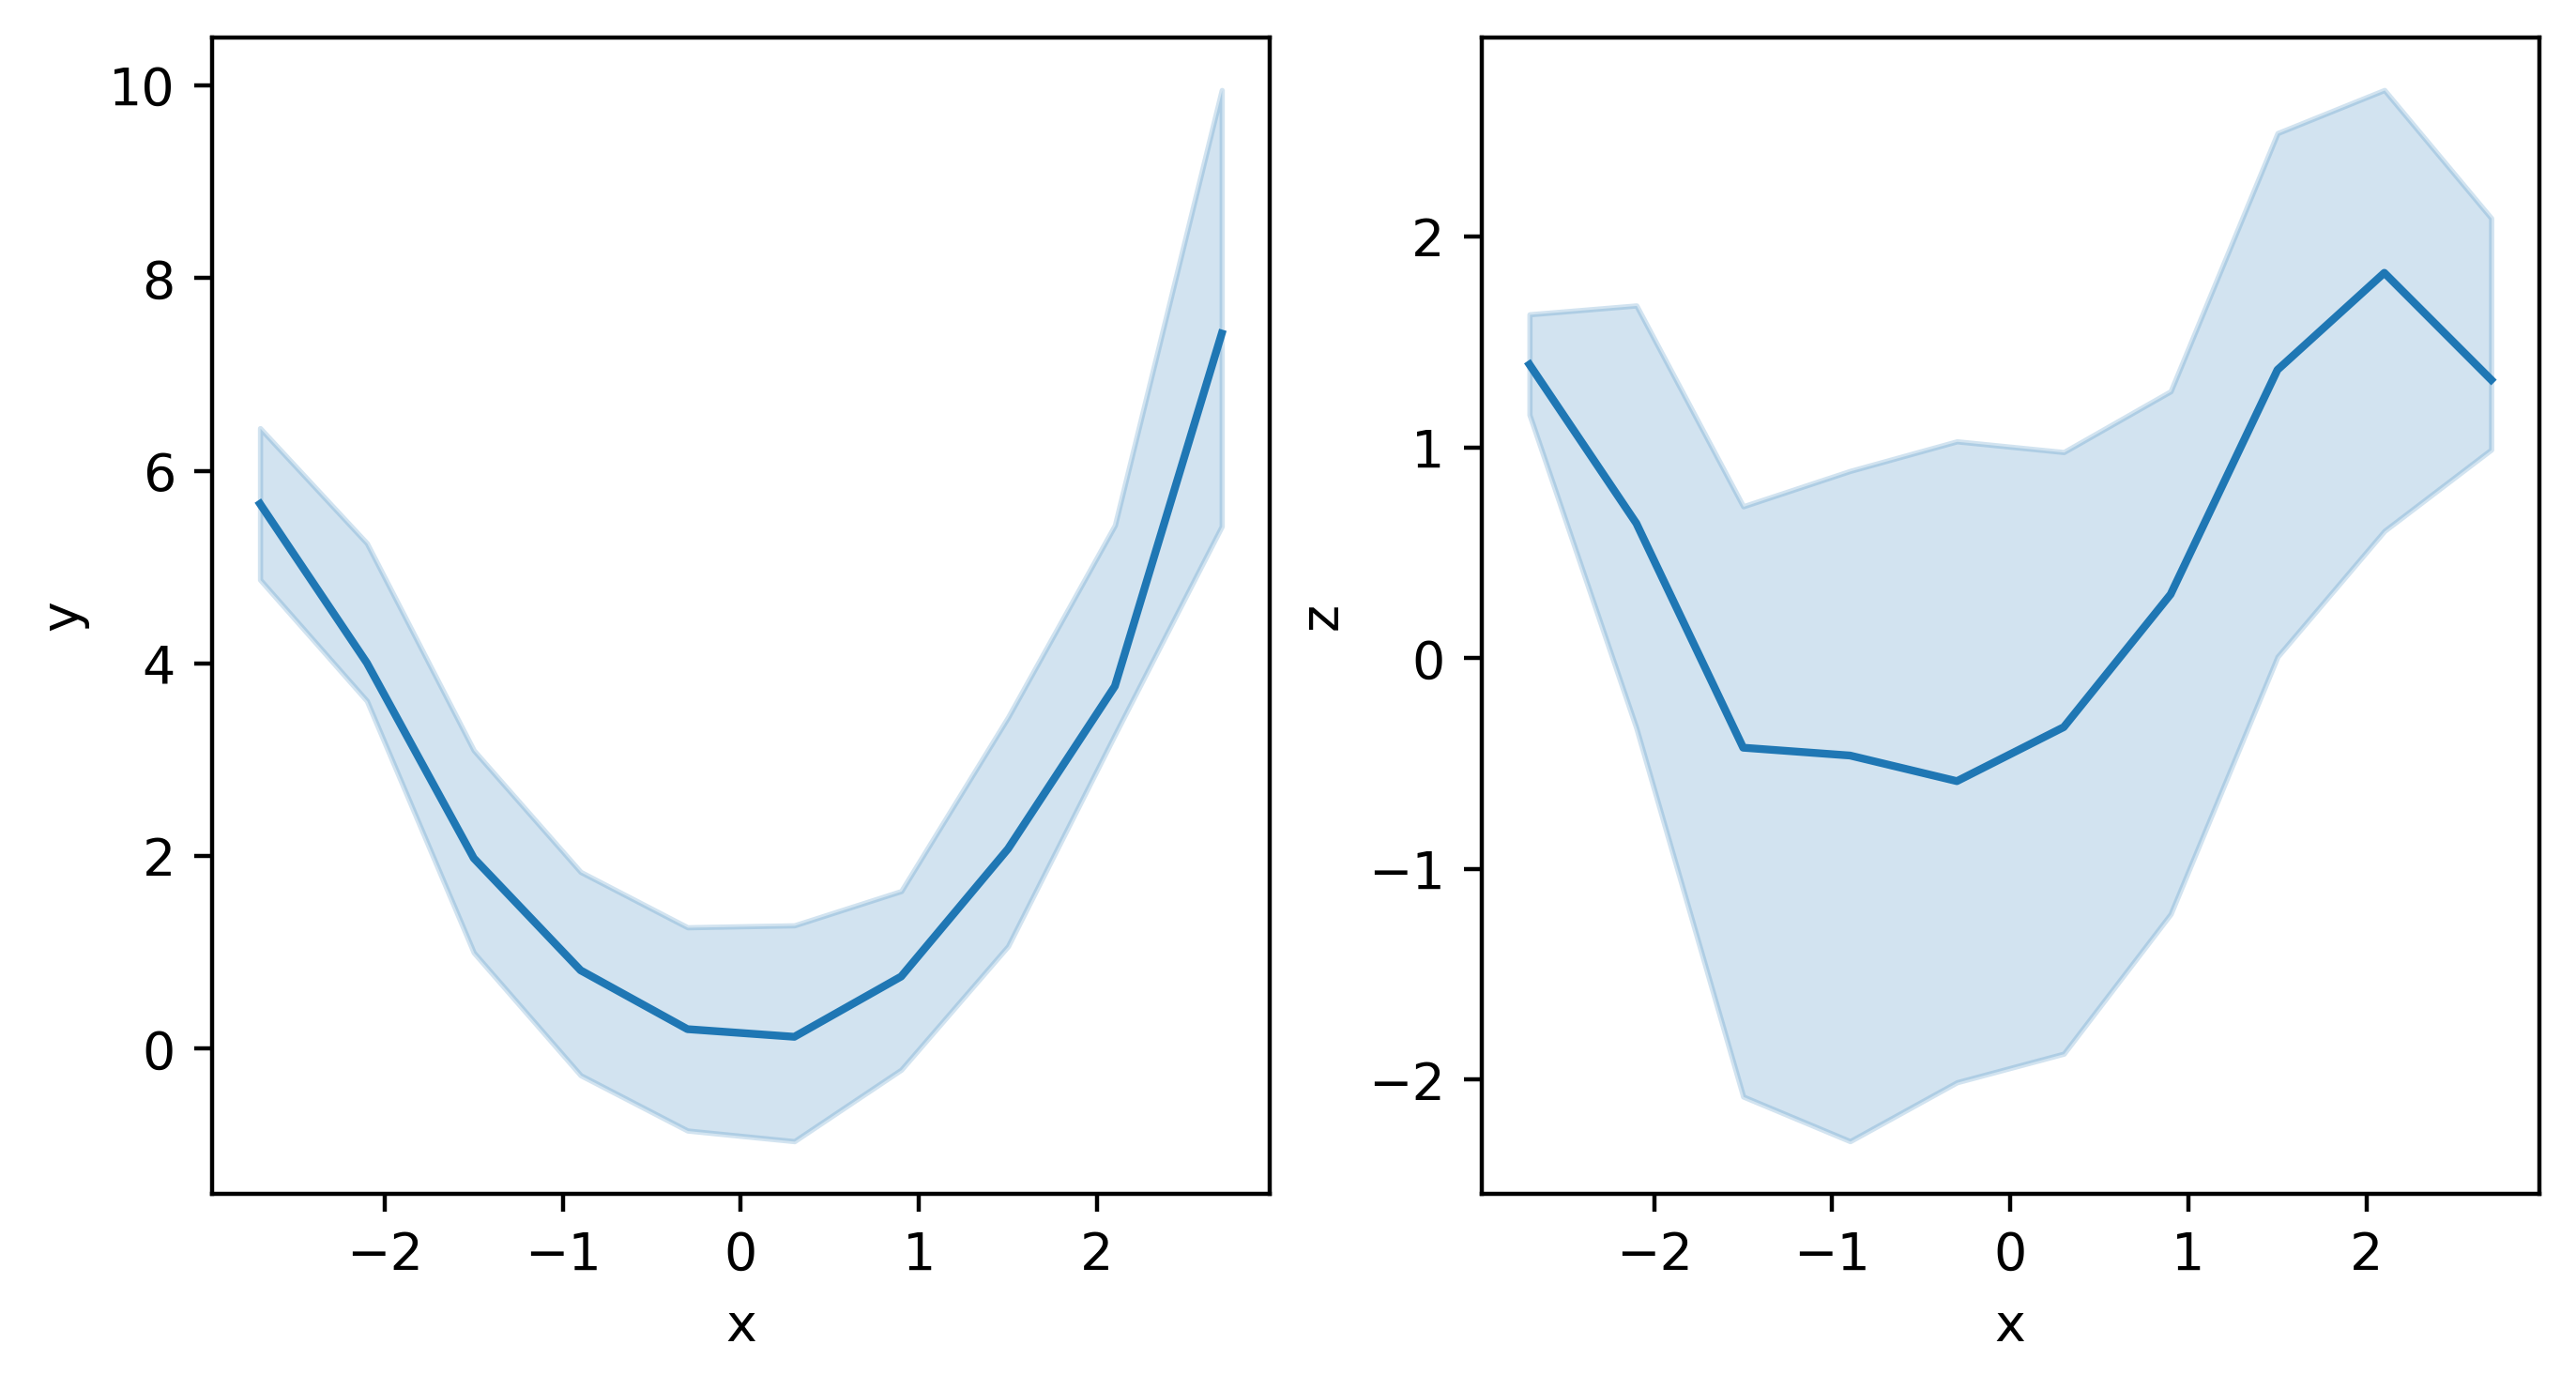

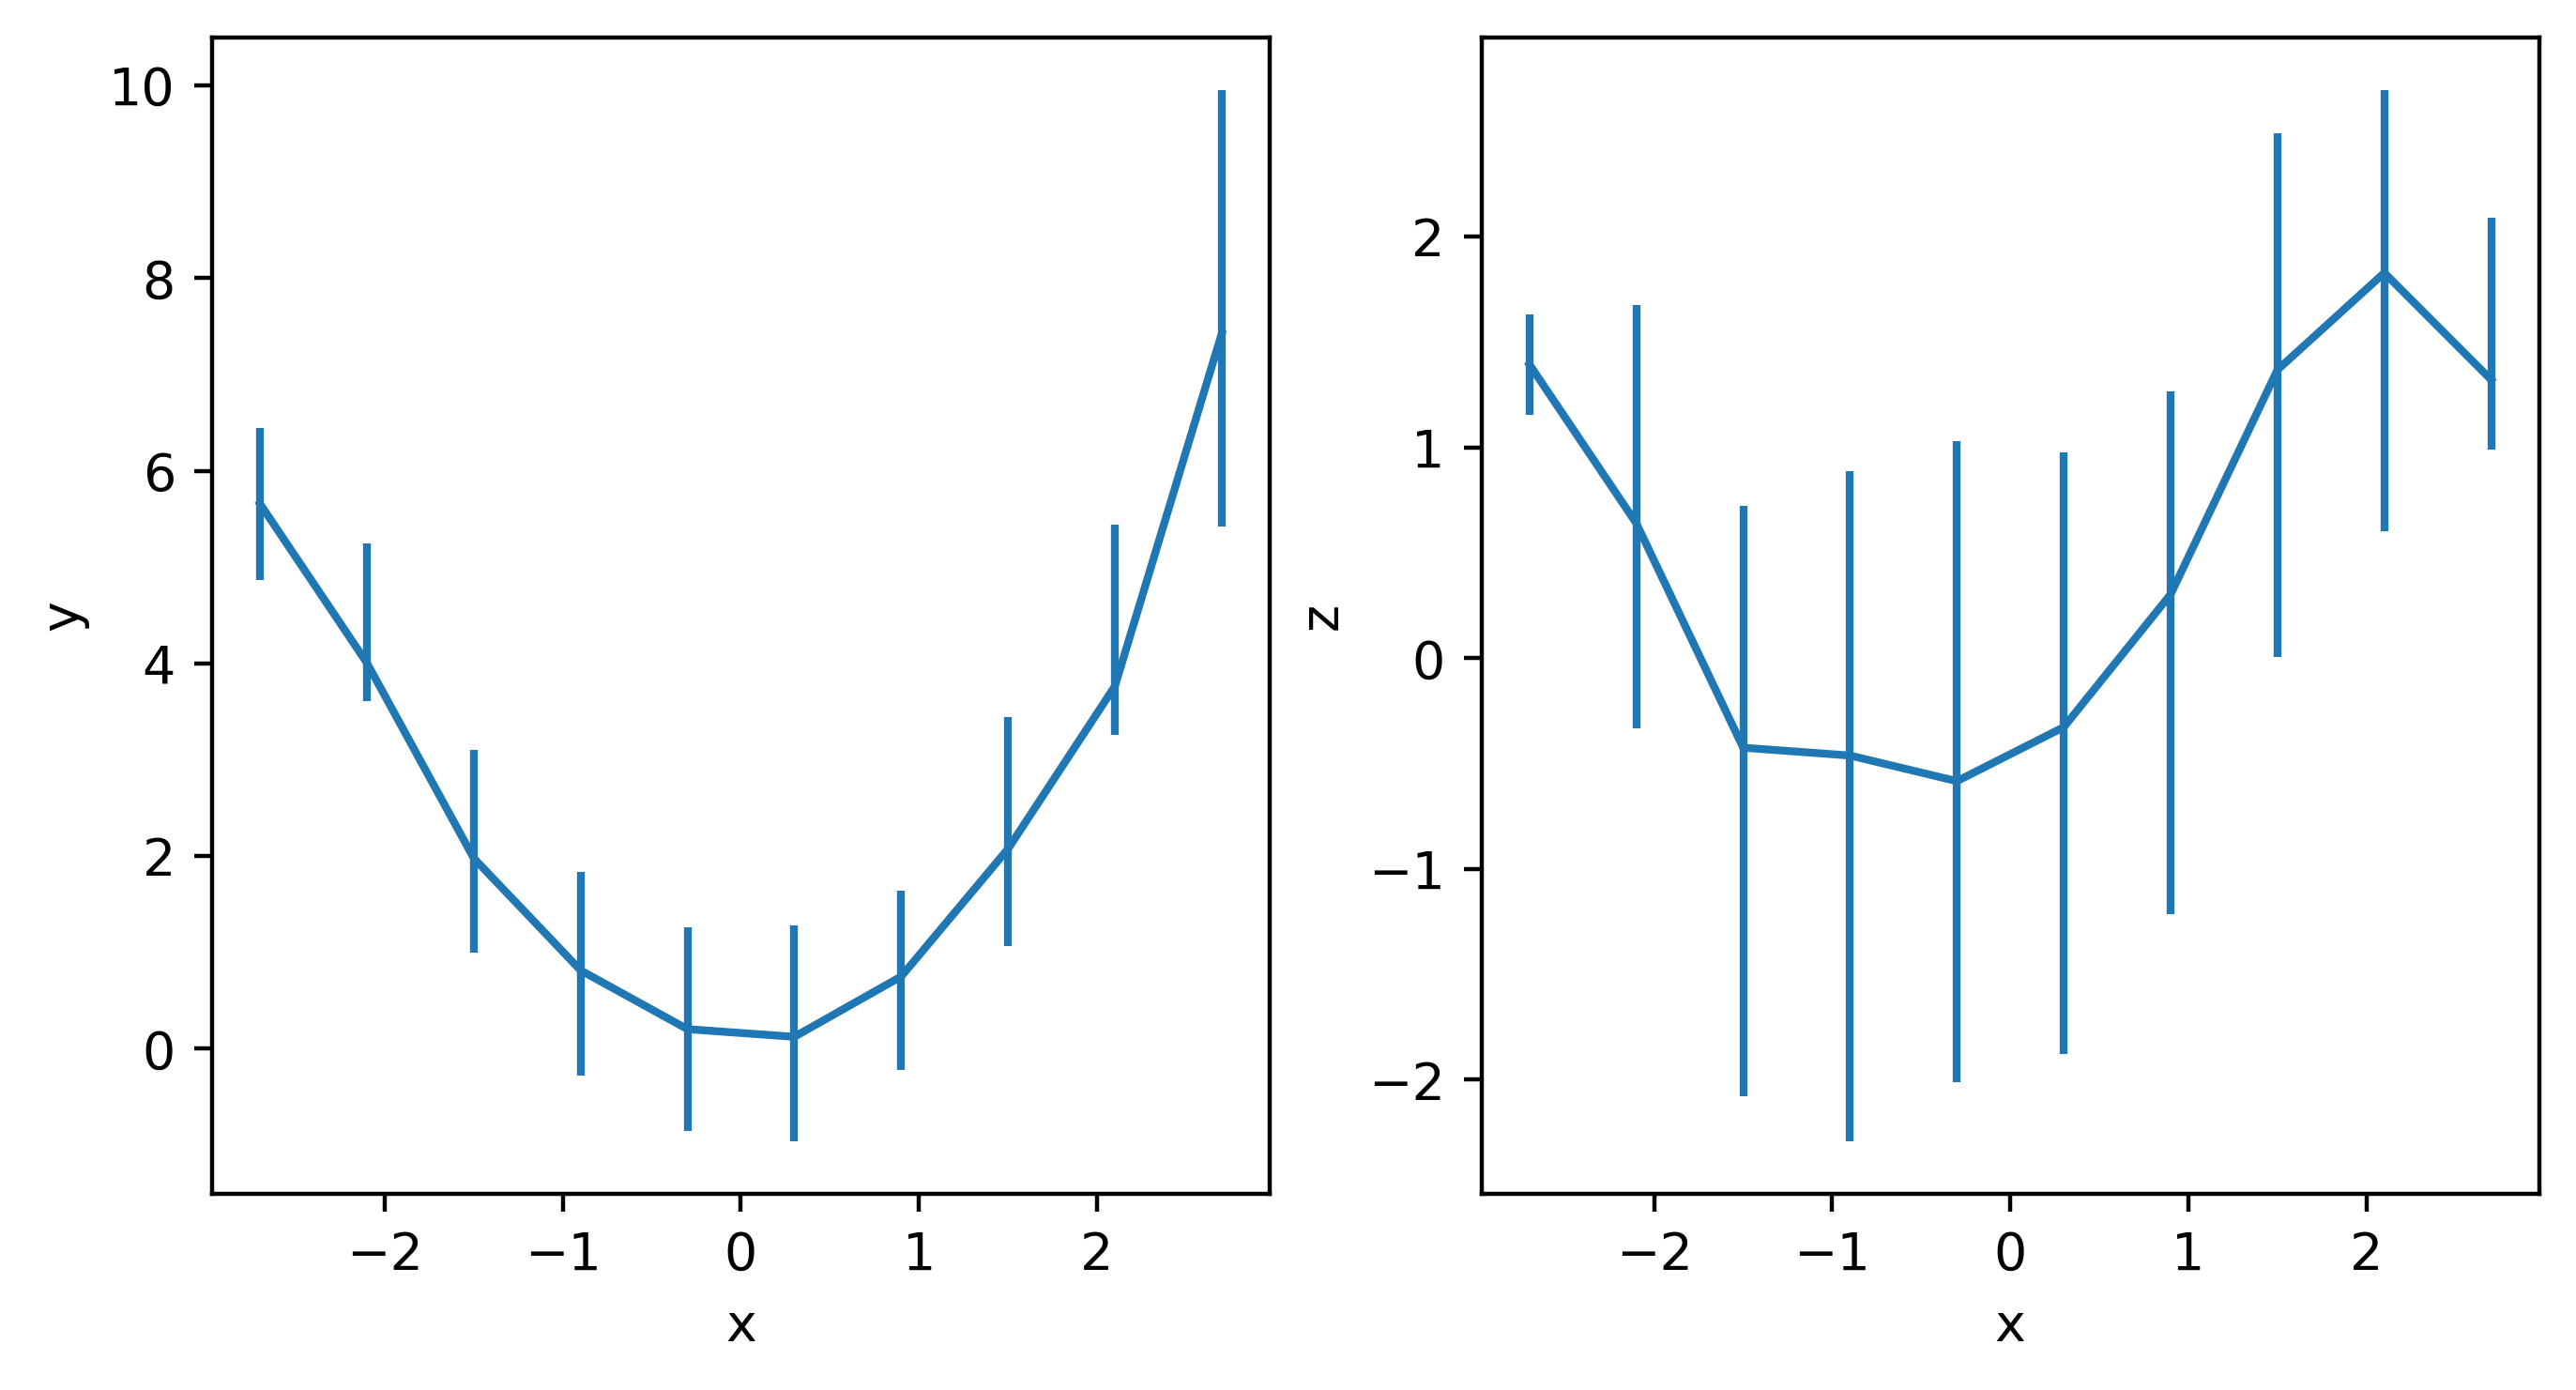

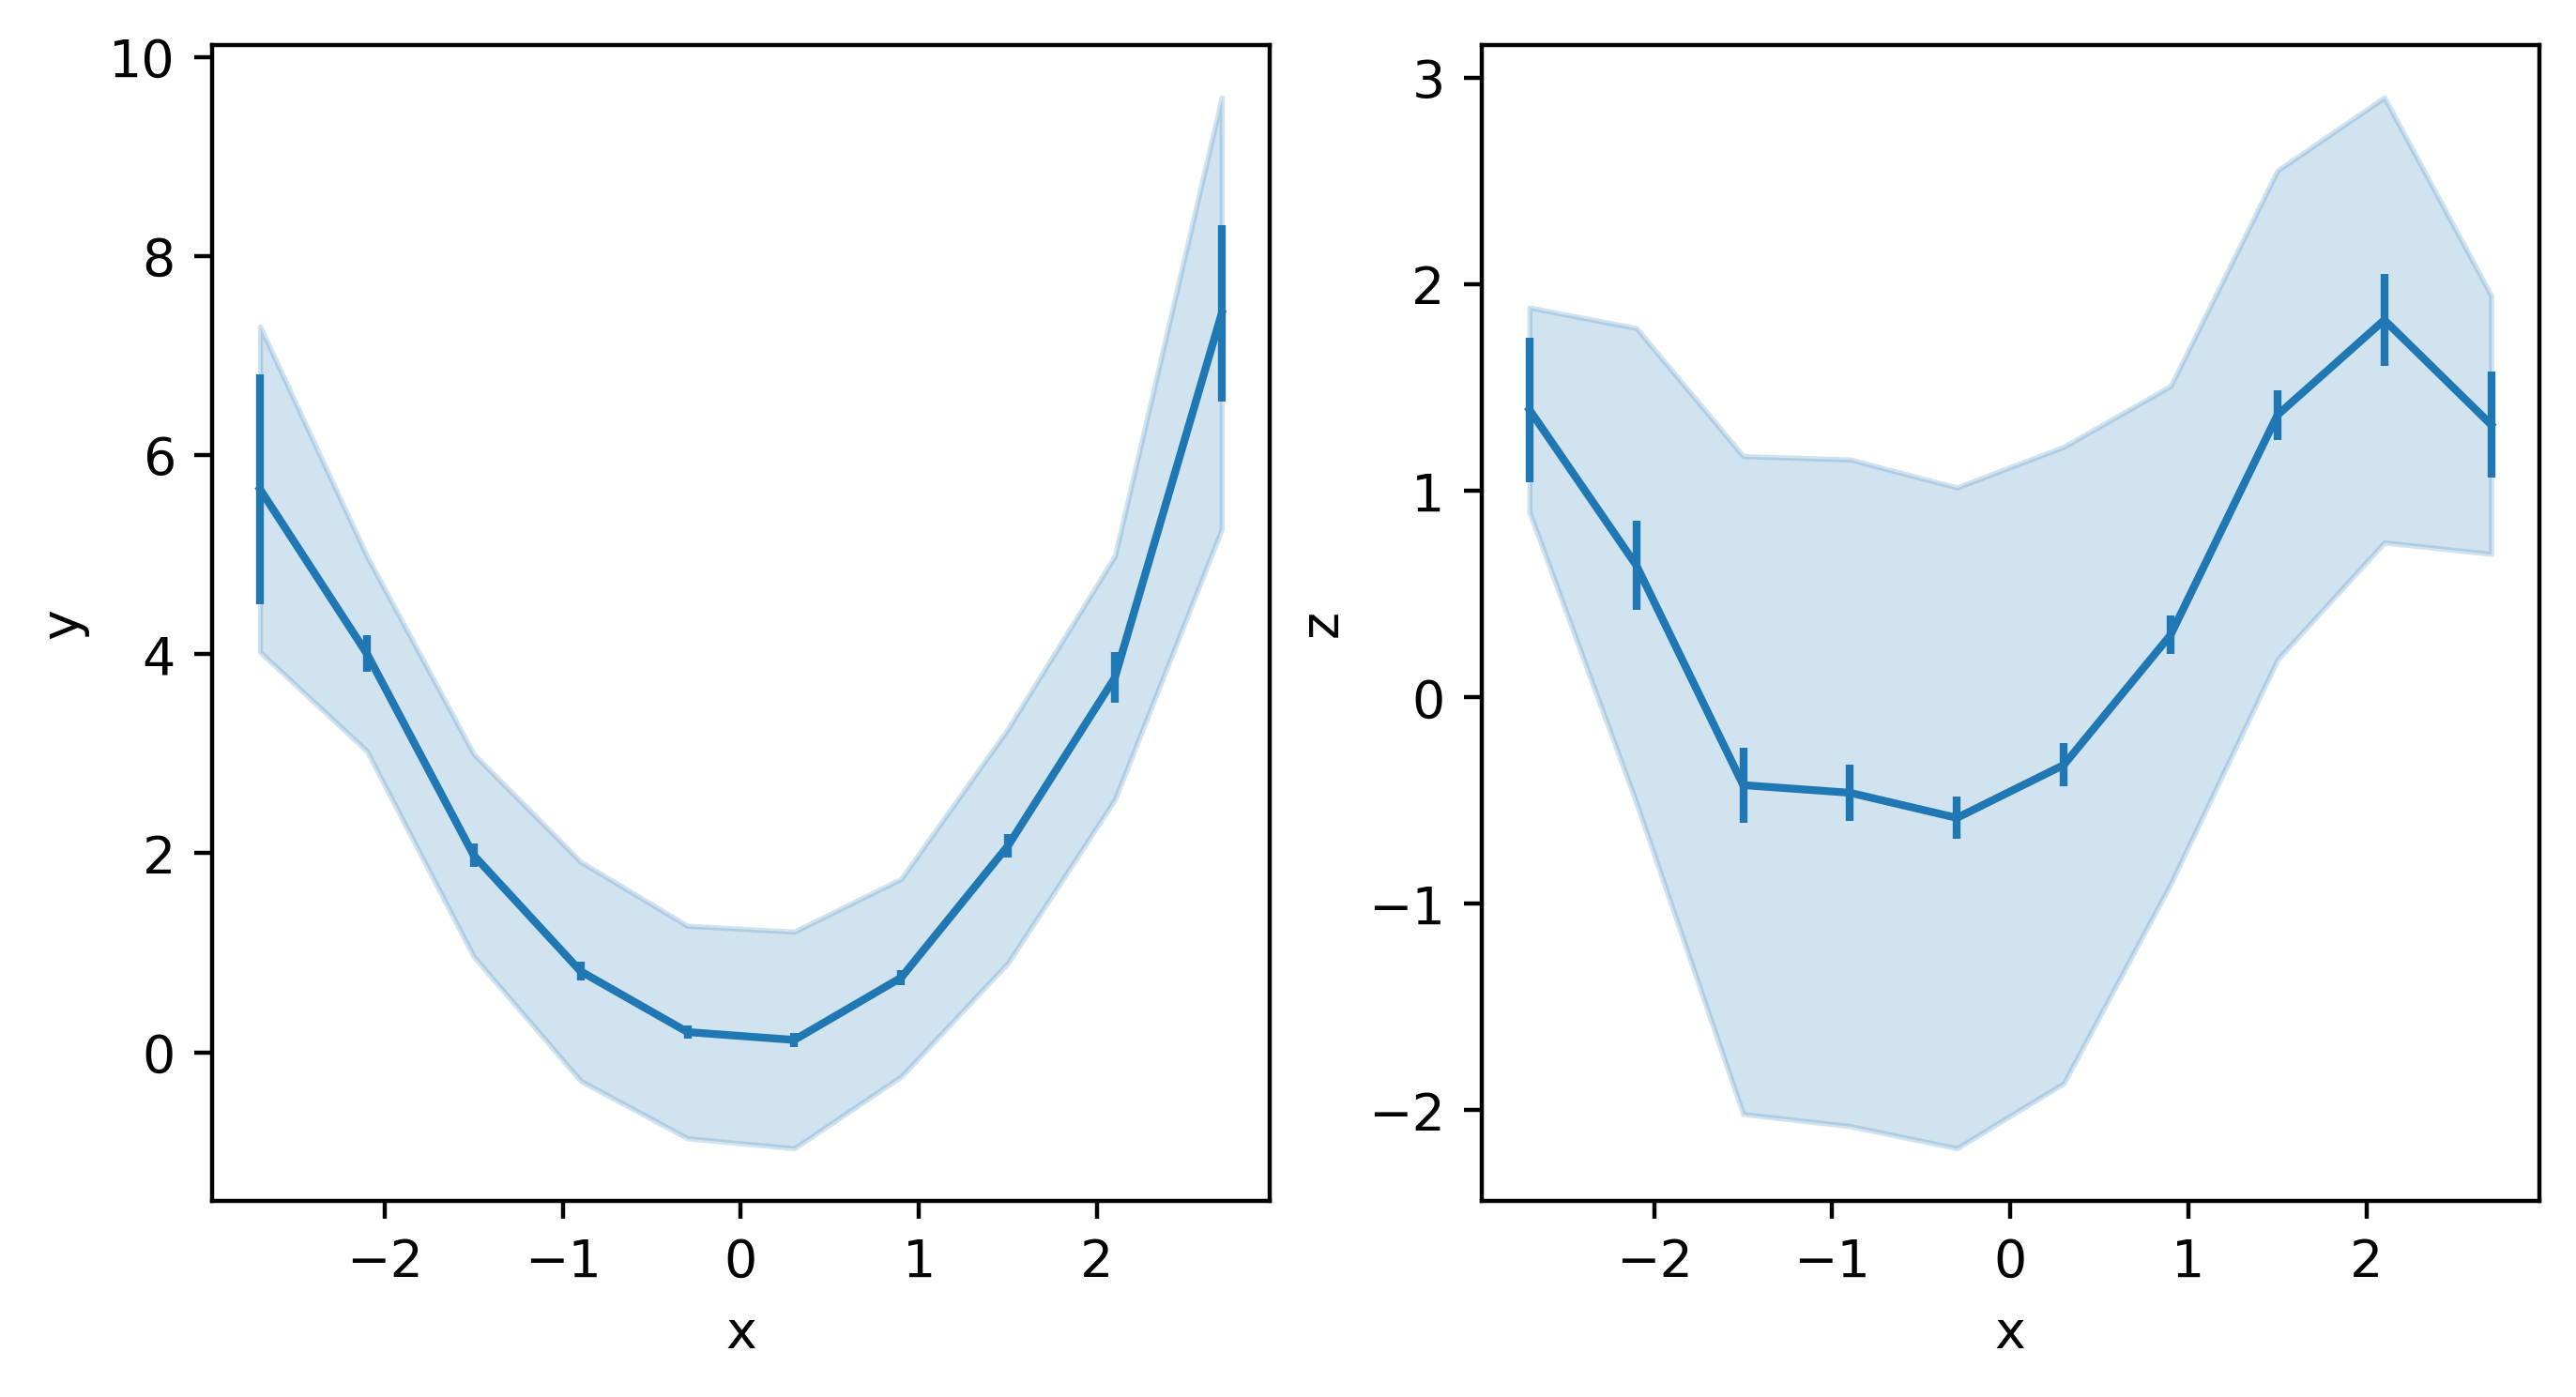

In [6]:
common_settings = {
    'range': [-3, 3],
    'bins': 10,
    'subplots_kwargs': {
        'figshape': (1, 2)
    },
}

dataset.trend('x', ['y', 'z'],
              y_method='median',
              yerr_method=None,
              fbetween_method='quantile',
              **common_settings)

dataset.trend('x', ['y', 'z'],
              y_method='median',
              yerr_method='quantile',
              fbetween_method=None,
              **common_settings)

dataset.trend('x', ['y', 'z'],
              y_method='median',
              yerr_method='std_mean',
              fbetween_method='sigma',
              **common_settings)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>],
       dtype=object))

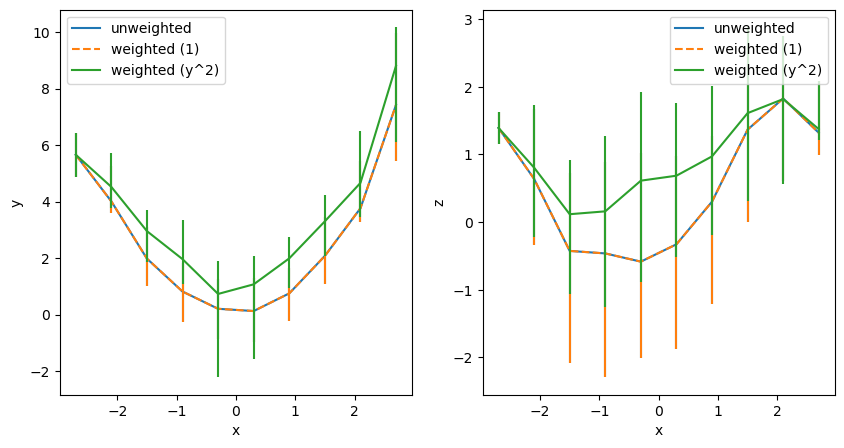

In [7]:
# weights
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

dataset.trend('x', ['y', 'z'],
              axes=axes,
              y_method='median',
              yerr_method='quantile',
              fbetween_method=None,
              plot_kwargs={'label': 'unweighted'},
              **common_settings)

dataset.trend('x', ['y', 'z'],
              axes=axes,
              y_method='median',
              weights=np.ones_like(x),
              yerr_method='quantile',
              fbetween_method=None,
              plot_kwargs={
                  'label': 'weighted (1)',
                  'linestyle': '--'
              },
              **common_settings)

dataset.trend('x', ['y', 'z'],
              axes=axes,
              y_method='median',
              weights=y**2,
              yerr_method='quantile',
              fbetween_method=None,
              plot_kwargs={'label': 'weighted (y^2)'},
              **common_settings)

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>],
       dtype=object))

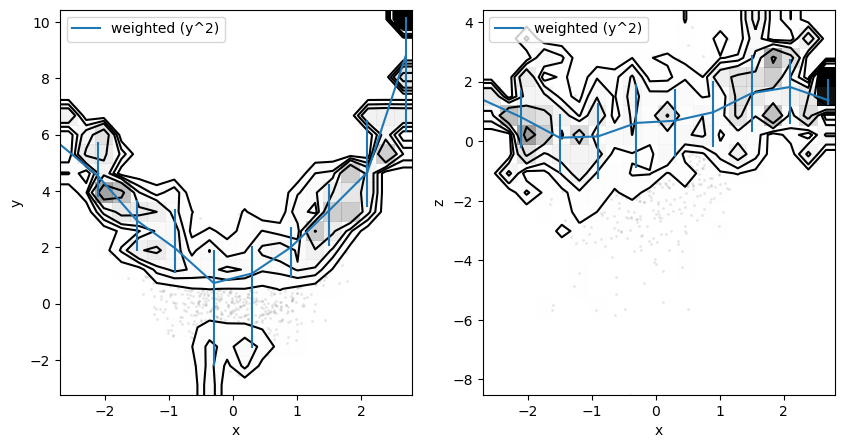

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
dataset.contour('x', ['y', 'z'], axes=axes, weights=y**2)

dataset.trend('x', ['y', 'z'],
              axes=axes,
              y_method='median',
              weights=y**2,
              yerr_method='quantile',
              fbetween_method=None,
              plot_kwargs={'label': 'weighted (y^2)'},
              **common_settings)

(<Figure size 3200x1600 with 2 Axes>,
 array([<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>],
       dtype=object))

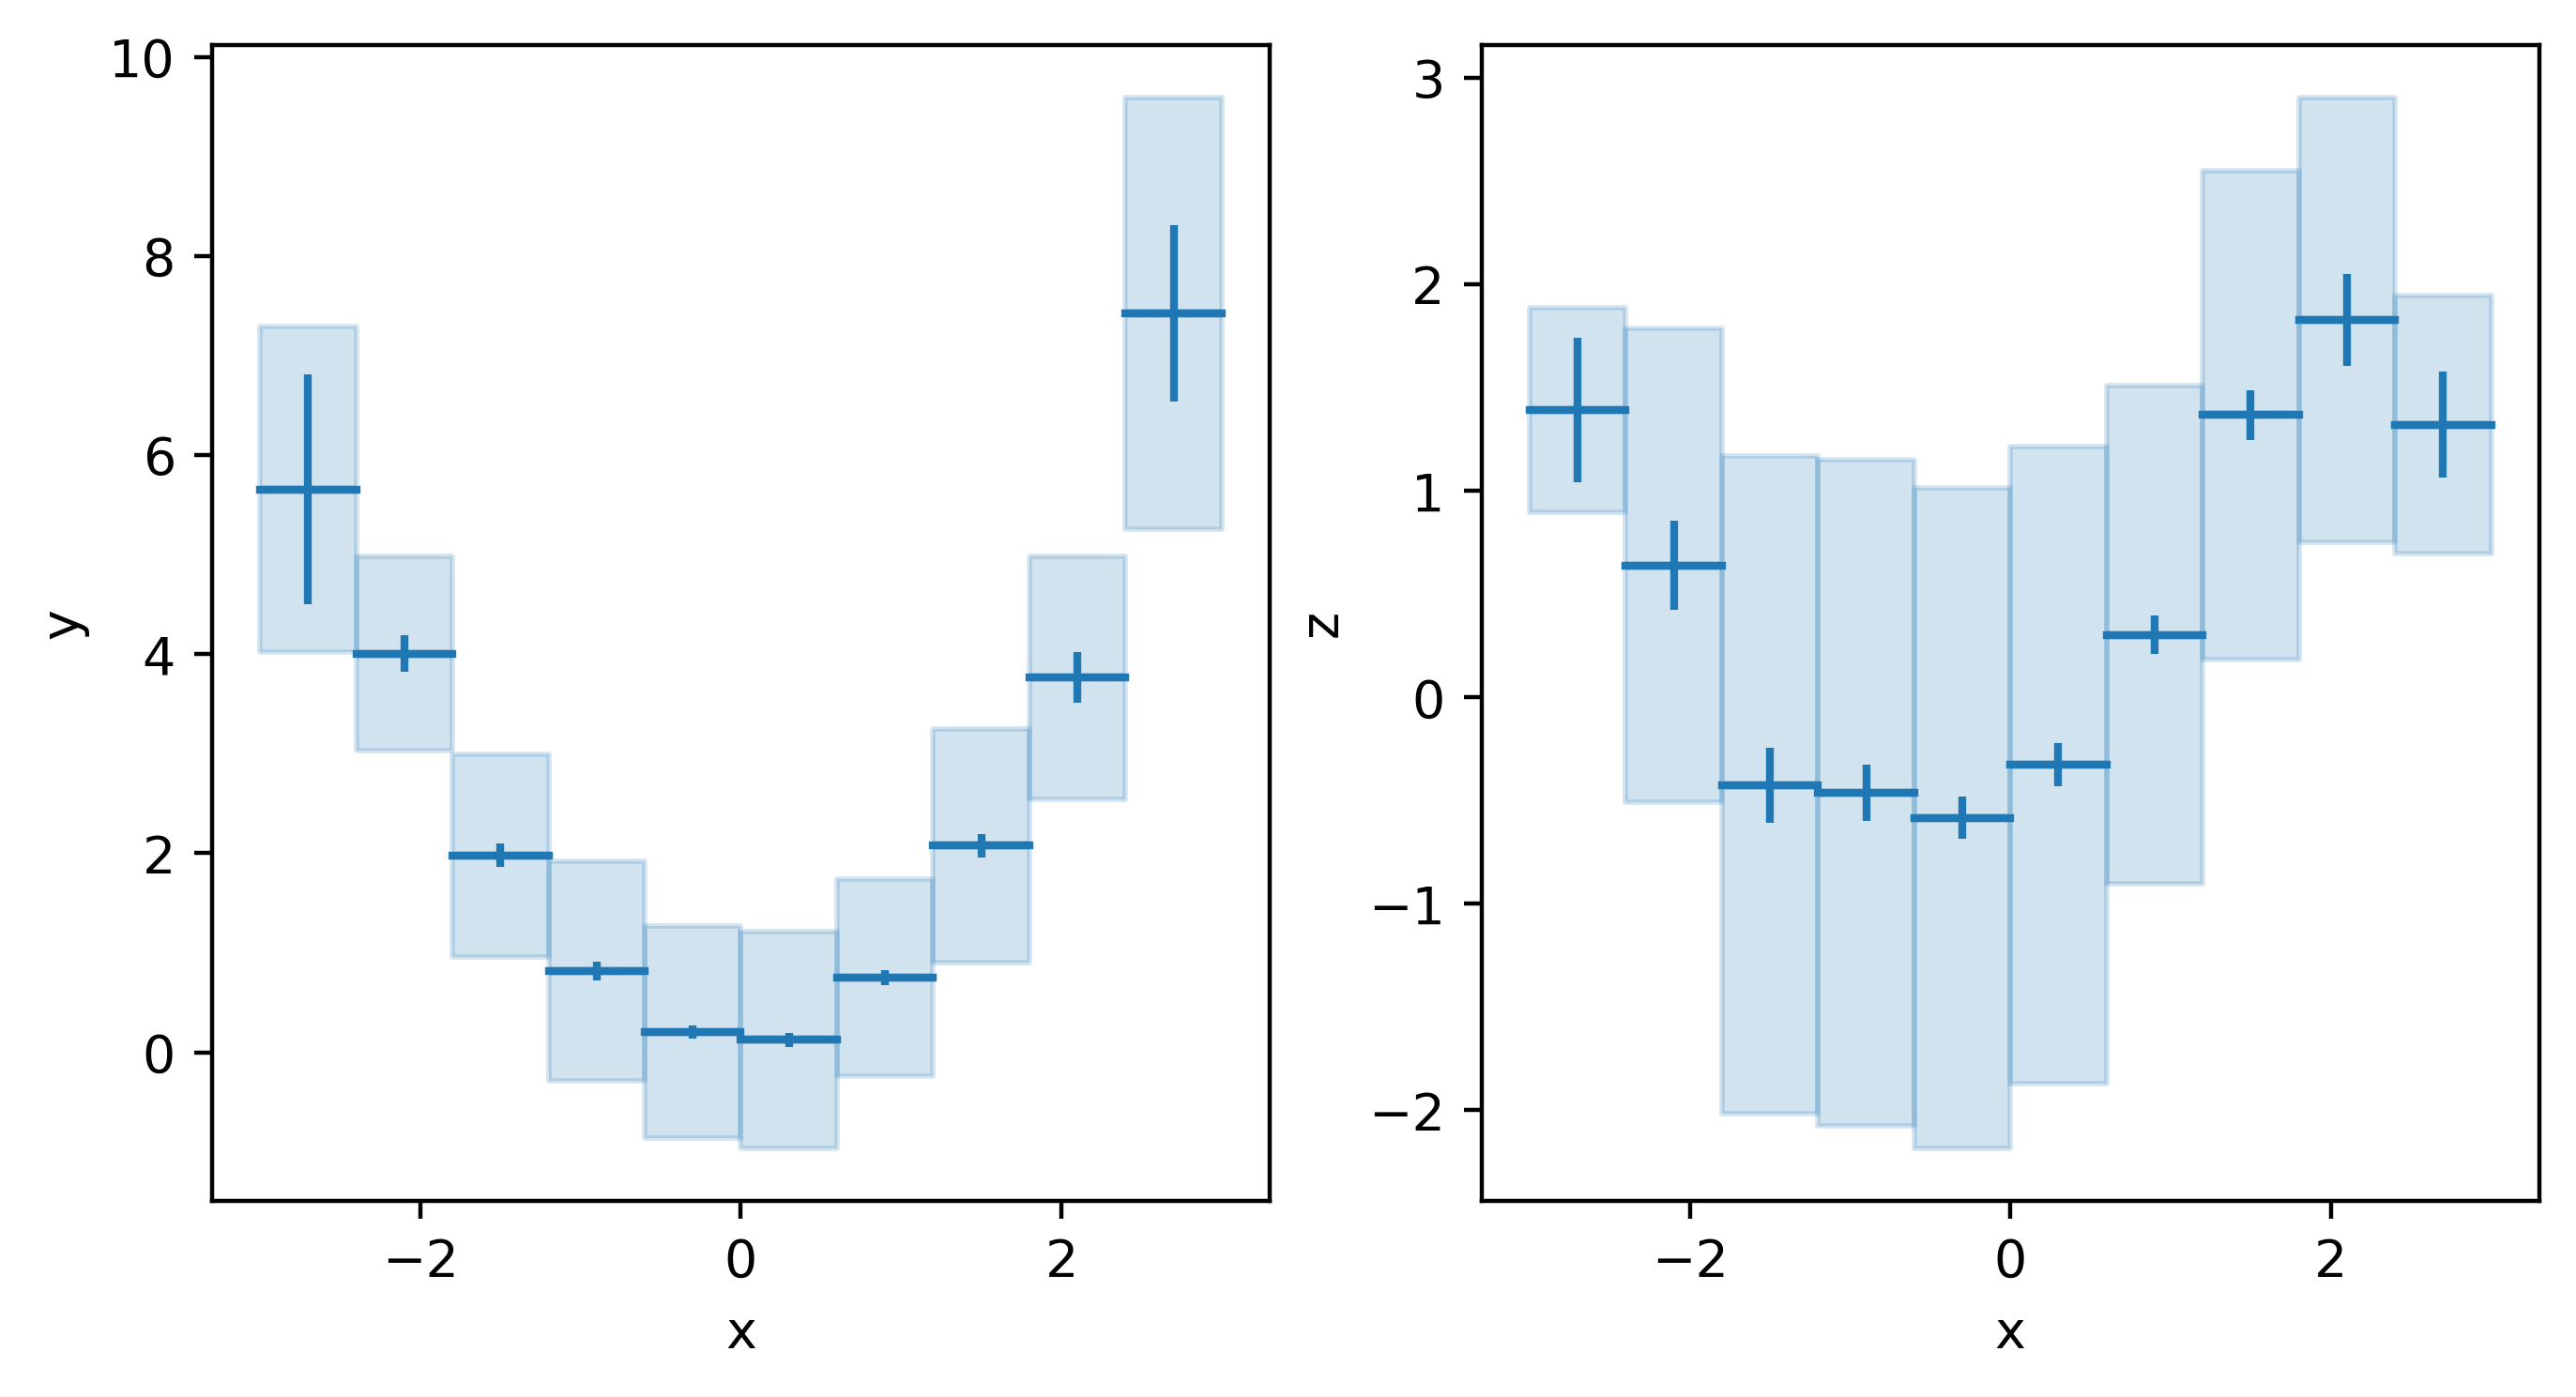

In [20]:
dataset.trend('x', ['y', 'z'],
              y_method='median',
              is_x_interval=True,
              yerr_method='std_mean',
              fbetween_method='sigma',
              **common_settings)